In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df_origin = pd.ExcelFile('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx').parse('Online Retail')
df_origin.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#check variables' type

df_origin.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
#drop NAs in CustomerID
#exclude cancelled transaction with 'C' before the InvoiceNo

df_origin.dropna(subset=['CustomerID'], inplace=True)
df_first = df_origin[~df_origin['InvoiceNo'].map(str).str.match('^C')]

In [5]:
#Count unique values for four variables

df_first[['CustomerID', 'InvoiceNo', 'StockCode', 'Description']].nunique()

CustomerID      4339
InvoiceNo      18536
StockCode       3665
Description     3877
dtype: int64

In [6]:
#sum total amount of transactions for each country
#find out the highest 5 countries

df_first.eval('Amount = Quantity * UnitPrice', inplace=True)
df_amount = df_first.groupby('Country')['Amount'].sum().sort_values(ascending=False)

absolute5 = list(df_amount.index[0:5])

df_amount.head()

Country
United Kingdom    7.308392e+06
Netherlands       2.854463e+05
EIRE              2.655459e+05
Germany           2.288671e+05
France            2.090240e+05
Name: Amount, dtype: float64

In [7]:
#compute monthly amount by countries

df_first.set_index('InvoiceDate', inplace=True)

df_second = df_first.groupby('Country')['Amount'].resample('M').sum().unstack(level=0)
df_second

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-31,1032.85,277.20,NaN,1809.91,NaN,NaN,363.53,1590.82,NaN,1281.50,...,NaN,NaN,NaN,1843.73,3834.30,1304.92,NaN,NaN,498661.850,NaN
2011-01-31,9017.71,0.00,NaN,1200.20,NaN,NaN,675.58,547.50,NaN,0.00,...,NaN,NaN,2053.07,10086.09,3486.32,4231.23,NaN,NaN,442190.060,NaN
2011-02-28,14695.42,518.36,NaN,2181.07,NaN,NaN,1784.71,4334.24,549.26,399.22,...,NaN,145.92,0.00,2114.50,509.50,2654.92,NaN,889.24,355655.630,NaN
2011-03-31,17223.99,1708.12,NaN,3351.98,NaN,140.54,3509.33,938.39,0.00,3978.99,...,NaN,NaN,0.00,5363.15,4720.58,1870.23,NaN,0.00,467198.590,NaN
2011-04-30,771.60,680.78,NaN,1989.48,1143.6,0.00,293.00,0.00,0.00,0.00,...,NaN,NaN,8209.58,1785.65,809.10,2076.94,383.95,0.00,409559.141,299.10
2011-05-31,13638.41,1249.43,548.4,2732.40,NaN,534.24,1207.24,0.00,0.00,515.70,...,NaN,NaN,0.00,3257.60,2681.98,3610.01,0.00,0.00,551568.820,852.68
2011-06-30,25187.77,0.00,NaN,4274.82,NaN,1171.46,2060.03,1109.32,0.00,3261.15,...,NaN,NaN,0.00,3333.21,832.00,7904.15,0.00,0.00,524915.480,185.78
2011-07-31,4964.38,1191.95,NaN,2475.57,NaN,1768.58,0.00,0.00,0.00,376.24,...,NaN,NaN,3949.32,7624.92,6802.09,3762.65,0.00,0.00,485612.251,798.48
2011-08-31,22489.20,1516.08,NaN,3554.02,NaN,51.56,4896.78,0.00,0.00,213.15,...,NaN,NaN,0.00,3346.91,1400.86,4969.89,0.00,0.00,498453.320,531.03


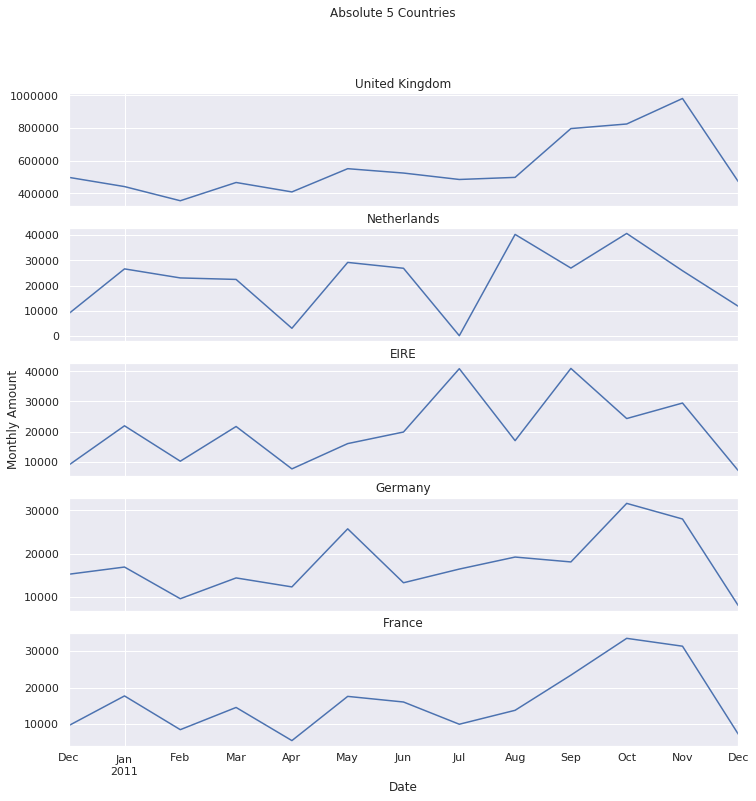

In [8]:
#plot monthly amount of 5 highest countries

fig, axs = plt.subplots(5, 1, figsize=(12,12), sharex=True)

fig.suptitle('Absolute 5 Countries')

for i, ax in enumerate(axs.flat):
    df_second[absolute5[i]].plot(ax=ax)
    ax.set_title(absolute5[i])
    ax.set_xlabel('Date')
    
axs[2].set_ylabel('Monthly Amount');

In [9]:
#sum amount groupby 'country' and 'Description'
#then find the 5 goods with largest amount 

df_goods = df_first.groupby(['Country', 'Description'])['Amount'].sum()

df_test = df_goods.groupby('Country').nlargest(5)
df_test.reset_index(level=0, drop=True, inplace=True)

df_test[absolute5]

Country         Description                        
EIRE            REGENCY CAKESTAND 3 TIER                 7388.55
                CARRIAGE                                 4875.00
                3 TIER CAKE TIN RED AND CREAM            4235.65
                Manual                                   3374.34
                JAM MAKING SET WITH JARS                 2976.00
France          POSTAGE                                 15454.00
                Manual                                   9492.37
                RABBIT NIGHT LIGHT                       7234.24
                REGENCY CAKESTAND 3 TIER                 2816.85
                RED TOADSTOOL LED NIGHT LIGHT            2130.15
Germany         POSTAGE                                 21001.00
                REGENCY CAKESTAND 3 TIER                 9061.95
                ROUND SNACK BOXES SET OF4 WOODLAND       3598.95
                Manual                                   2296.25
                ROUND SNACK BOXES SET 

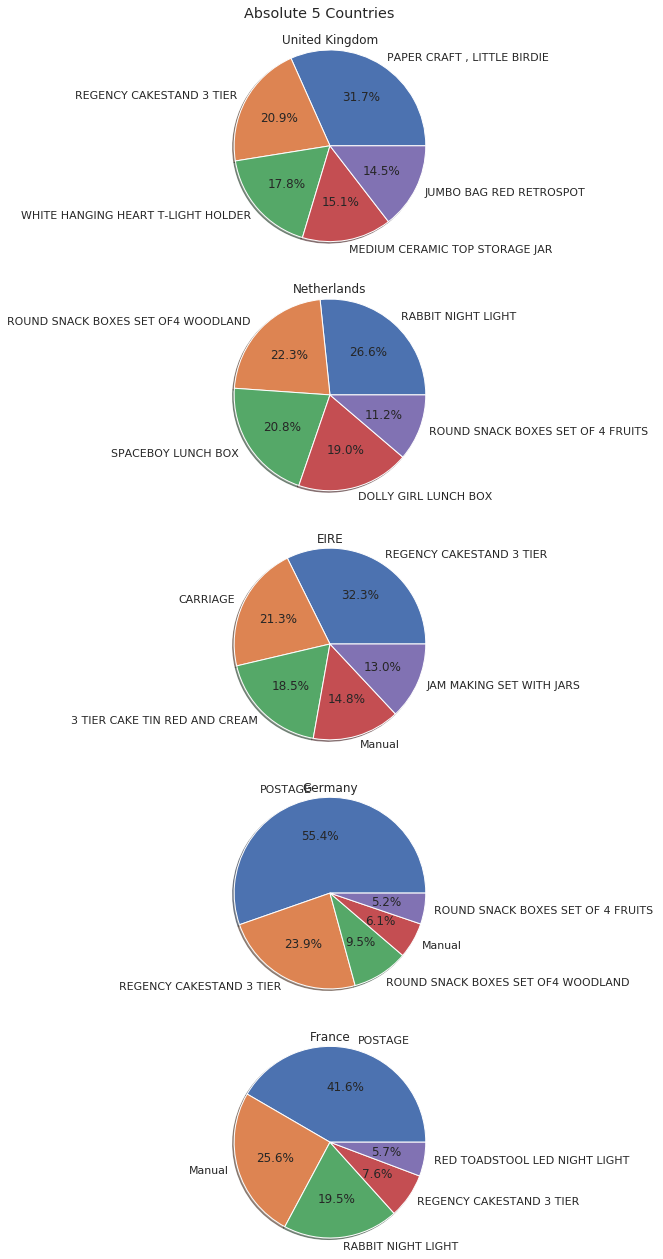

In [13]:
#pie plot of the 5 goods of 5 countries

fig, axs = plt.subplots(5, 1, figsize=(12,20), sharex=True)

plt.subplots_adjust(hspace=0.3, top=0.95)

fig.suptitle('Absolute 5 Countries')


for i, ax in enumerate(axs.flat):
    df_test[absolute5[i]].plot(kind='pie', ax=ax, shadow=True, autopct='%1.1f%%', radius=1.25)
    ax.set_title(absolute5[i])
    ax.set_ylabel('')